In [186]:
import numpy as np #linearna algebra
import pandas as pd #obrada podataka
import matplotlib.pyplot as plt #vizualizacija
import seaborn as sns #vizualizacija

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from warnings import filterwarnings
filterwarnings('ignore')

In [187]:
data = pd.read_csv('data/cell_samples.csv', header=None);
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2


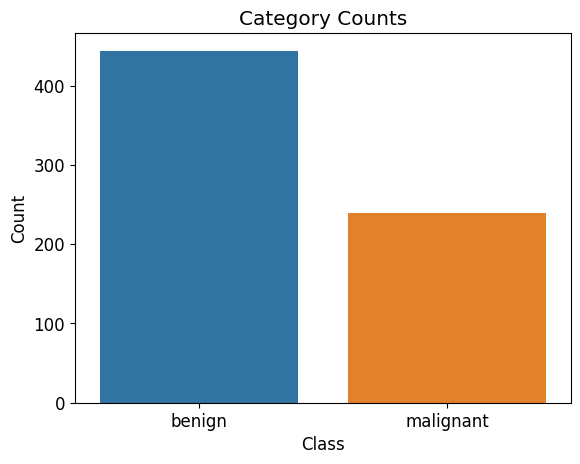

In [188]:
#rename categories to benign and malignant
data['Class'] = data['Class'].replace(['2','4'],['benign','malignant'])

plt.title("Category Counts")
sns.countplot(x='Class',data=data)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [189]:
#count the number of benign and malignant cells
data['Class'].value_counts()

benign       444
malignant    239
Name: Class, dtype: int64

In [190]:
y = data["Class"]
X = data.drop(columns="Class")

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=32)

In [192]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_scores = nb.predict(X_test)

print(f'Naive Bayes classifier test accuracy = {nb.score(X_test,y_test)}')

Naive Bayes classifier test accuracy = 0.975609756097561


In [193]:
result = permutation_importance(nb, X_test, y_test, n_repeats=10, random_state=42)
for i, feature_name in enumerate(X_test.columns):
    importance_score = result.importances_mean[i]
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")

Feature: Clump, Importance Score: -0.0004878048780487809
Feature: UnifSize, Importance Score: 0.08780487804878045
Feature: UnifShape, Importance Score: 0.061951219512195066
Feature: MargAdh, Importance Score: 0.07024390243902434
Feature: SingEpiSize, Importance Score: 0.039999999999999966
Feature: BareNuc, Importance Score: 0.1307317073170732
Feature: BlandChrom, Importance Score: 0.011707317073170742
Feature: NormNucl, Importance Score: 0.10682926829268291
Feature: Mit, Importance Score: 0.03317073170731707


In [202]:
cm = confusion_matrix(y_test, y_scores)
print( cm)
print( classification_report(y_test, y_scores))

[[130   3]
 [  2  70]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.96      0.97      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



In [203]:
y_scores = np.where(y_scores=='benign', 0, y_scores)
y_scores = np.where(y_scores=='malignant', 1, y_scores)

y_test = y_test.replace(['benign','malignant'],[0,1])

y_scores = y_scores.astype(int)
y_test = y_test.astype(int)

In [204]:
sensitivity = []
for i in range(len(cm)):
    tp = cm[i, i]
    fn = sum(cm[i, :]) - tp
    print(f"Class {i}: Sensitivity = {tp / (tp + fn)}")

Class 0: Sensitivity = 0.9774436090225563
Class 1: Sensitivity = 0.9722222222222222


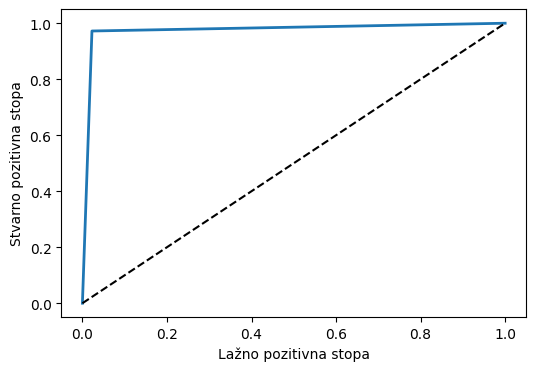

In [205]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10

plt.xlabel('Lažno pozitivna stopa')

plt.ylabel('Stvarno pozitivna stopa')

plt.show()